## Import de librerias y DF

In [81]:
# importo librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import numpy as np
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')


In [82]:
# importo df
df_churn = pd.read_csv(r'Churn.csv', sep=';', decimal=',')

In [83]:
# primeras 5 filas del df
df_churn.head(5)

,State,Account_Length,Area_Code,Phone,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [84]:
# Se analiza el tipo de formato de los datos
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3099 non-null   object 
 1   Account_Length  3099 non-null   int64  
 2   Area_Code       3099 non-null   int64  
 3   Phone           3099 non-null   object 
 4   Intl_Plan       3099 non-null   object 
 5   Vmail_Plan      3099 non-null   object 
 6   Vmail_Message   3099 non-null   int64  
 7   Day_Mins        3099 non-null   float64
 8   Day_Calls       3099 non-null   int64  
 9   Day_Charge      3099 non-null   float64
 10  Eve_Mins        3099 non-null   float64
 11  Eve_Calls       3099 non-null   int64  
 12  Eve_Charge      3099 non-null   float64
 13  Night_Mins      3099 non-null   float64
 14  Night_Calls     3099 non-null   int64  
 15  Night_Charge    3099 non-null   float64
 16  Intl_Mins       3099 non-null   float64
 17  Intl_Calls      3099 non-null   i

In [85]:
# Pasamos a categorica el codigo de area porque está como numérica      
df_churn['Area_Code'] = df_churn['Area_Code'].astype('object')

In [86]:
# Analisis de cuántos area code distintos hay
# Solamente hay 3 area code lo cual es sospechoso porque debería haber uno por cada estado
df_churn['Area_Code'].value_counts()


Area_Code
415    1543
510     781
408     775
Name: count, dtype: int64

In [87]:
# Analis de cuántos states distintos hay para confirmar si Area code es un dato anómalo
df_churn['State'].nunique()

51

In [88]:
df_churn = df_churn.drop(columns=['Area_Code'])


### Tal como se logra observar, hay 51 estados distintos en el dataset y 3 códigos de área nada más, por lo que se procede a eliminar del análisis la variable



In [89]:
# El Data Frame tiene 3099 filas y 21 columnas
df_churn.shape

(3099, 20)

In [90]:
# resumen estadistico de los datos
df_churn.describe()

,Account_Length,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
count,3099.00000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000
mean,101.18393,8.074540,179.596999,100.366570,30.532043,201.024266,100.013875,17.087270,200.682995,99.971281,9.030810,10.236528,4.462407,2.764372,1.555340
std,39.85297,13.668535,54.632572,20.081223,9.287510,50.900248,19.860313,4.326493,50.613708,19.508605,2.277665,2.782396,2.441330,0.751239,1.312804
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.00000,0.000000,143.900000,87.000000,24.460000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.00000,0.000000,179.300000,101.000000,30.480000,201.300000,100.000000,17.110000,201.300000,100.000000,9.060000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,19.500000,216.000000,114.000000,36.720000,235.800000,113.500000,20.040000,235.150000,113.000000,10.580000,12.100000,6.000000,3.270000,2.000000
max,243.00000,51.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,395.000000,175.000000,17.770000,20.000000,19.000000,5.400000,9.000000


### No se observan valores irracionales, no se hallan valores inferiores a 0.

In [91]:
# No hay nulos
df_churn.isna().sum().sum()

np.int64(0)

In [92]:
# EL data frame posee 447 casos de churn
df_churn.Churn.value_counts()

Churn
False.    2652
True.      447
Name: count, dtype: int64

In [93]:
# La tasa de abandono es aproximadamente de un 14 %
df_churn.Churn.value_counts('%')

Churn
False.    0.85576
True.     0.14424
Name: proportion, dtype: float64

In [94]:
# Transformo Churn en numeric para trabajarlo mas facilmente
df_churn['Flag_churn'] = df_churn['Churn'].map({'True.': 1, 'False.': 0})
df_churn['Vmail_Plan'] = df_churn['Vmail_Plan'].map({'yes': 1, 'no': 0})
df_churn['Intl_Plan'] = df_churn['Intl_Plan'].map({'yes': 1, 'no': 0})
df_churn = df_churn.drop(columns=['Churn'])

## Univariado

### Analisis univariado de las variables mas importantes

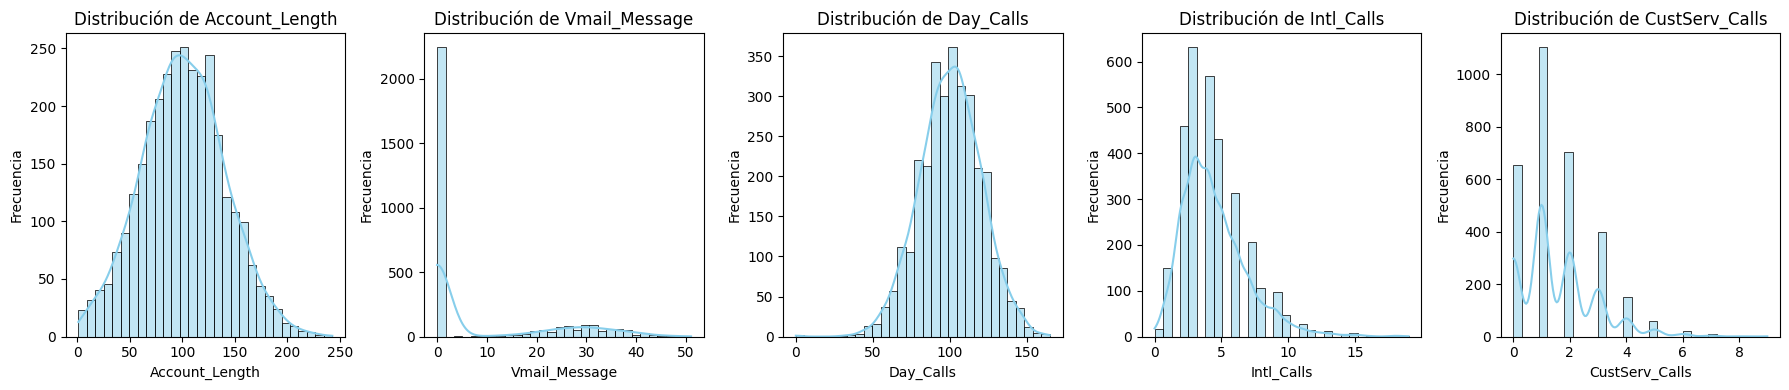

In [95]:

# Variables numéricas
variables_numericas = ['Account_Length','Vmail_Message','Day_Calls','Intl_Calls', 'CustServ_Calls']

fig, axes = plt.subplots(1, len(variables_numericas), figsize=(18, 4))
for i, var in enumerate(variables_numericas):
    sns.histplot(df_churn[var], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

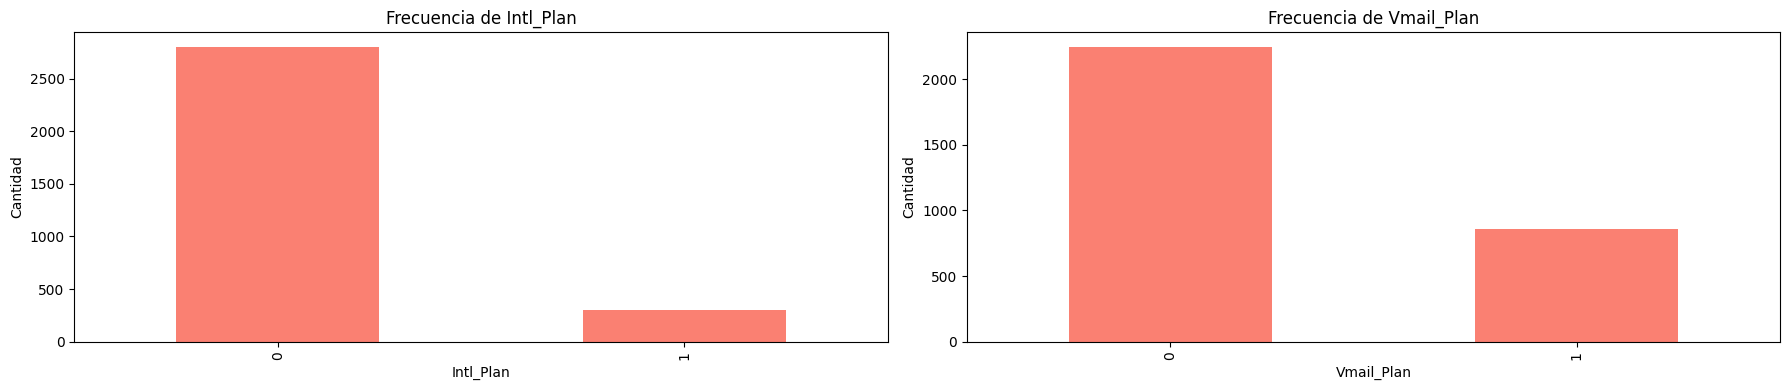

In [96]:
# Variables categóricas
variables_categoricas = ['Intl_Plan', 'Vmail_Plan']

fig, axes = plt.subplots(1, len(variables_categoricas), figsize=(18, 4))
for i, var in enumerate(variables_categoricas):
    df_churn[var].value_counts().plot(kind='bar', color='salmon', ax=axes[i])
    axes[i].set_title(f'Frecuencia de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Cantidad')
plt.tight_layout()
plt.show()

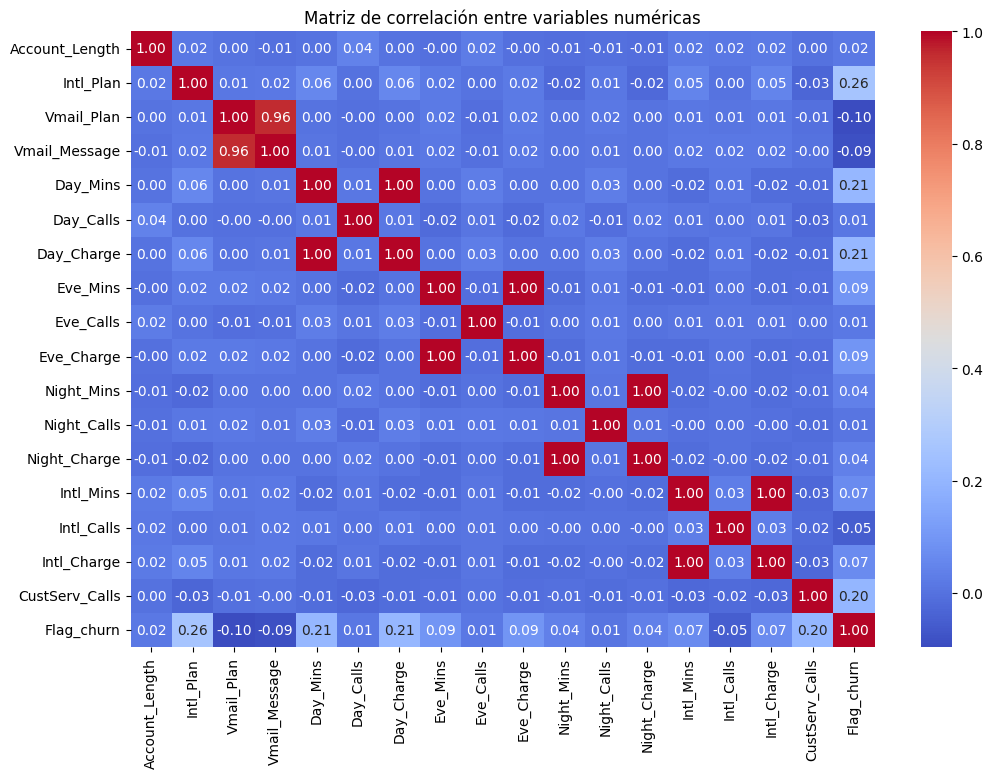

In [97]:
# Calcular y mostrar la matriz de correlación de las variables numéricas
correlacion = df_churn.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [98]:
# Detectar variables con correlación mayor al 90% (positiva o negativa)
umbral = 0.9
correlaciones_altas = []

# Recorremos la matriz de correlación solo por encima de la diagonal principal
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        valor_corr = correlacion.iloc[i, j]
        if abs(valor_corr) > umbral:
            correlaciones_altas.append((
                correlacion.columns[i],
                correlacion.columns[j],
                valor_corr
            ))

if correlaciones_altas:
    print("Pares de variables con correlación mayor al 90% (positiva o negativa):")
    for var1, var2, corr in correlaciones_altas:
        print(f"{var1} y {var2}: correlación = {corr:.2f}")
else:
    print("No se encontraron pares de variables con correlación mayor al 90%.")


Pares de variables con correlación mayor al 90% (positiva o negativa):
Vmail_Plan y Vmail_Message: correlación = 0.96
Day_Mins y Day_Charge: correlación = 1.00
Eve_Mins y Eve_Charge: correlación = 1.00
Night_Mins y Night_Charge: correlación = 1.00
Intl_Mins y Intl_Charge: correlación = 1.00


In [99]:
# Se elimina una de las variables correlacionadas
df_churn = df_churn.drop(columns=['Day_Charge','Eve_Charge','Night_Charge','Intl_Charge'])
df_churn

,State,Account_Length,Phone,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,CustServ_Calls,Flag_churn
0,KS,128,382-4657,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,371-7191,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,358-1921,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,375-9999,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,330-6626,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,MN,91,382-9297,0,0,0,133.8,61,158.8,96,189.6,92,10.5,2,1,0
3095,AL,181,330-9294,0,1,27,190.3,93,249.0,127,215.7,82,10.6,4,1,0
3096,CO,118,362-8763,0,1,36,294.9,106,165.7,115,189.2,63,9.8,5,3,0
3097,ME,112,403-4816,0,0,0,185.4,114,191.4,119,144.0,78,10.0,11,2,0


### Tal como se puede observar, Day_Mins y Day_Charge - Eve_Mins y Eve_Charge - Night_Mins y Night_Charge - Intl_Mins y Intl_Charge tienen una correlación perfecta positiva, por lo que se eliminan las variables de monto porque el monto es menos estable en el tiempo por ejemplo por la inflación


## Bi Variado

### Analisis univariado de las variables mas importantes

In [100]:
# Se compara cada variable con respecto al Churn para entender el comportamiento frente a la variable de clase
variables_categoricas = ['Vmail_Plan', 'Intl_Plan']  

for var in variables_categoricas:
    print(f"\nTabla de contingencia para {var} vs Flag_churn:")
    display(pd.crosstab(df_churn[var], df_churn['Flag_churn'], margins=True, normalize='index'))

variables_numericas = df_churn.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_numericas = [v for v in variables_numericas if v != 'Flag_churn']



Tabla de contingencia para Vmail_Plan vs Flag_churn:


Flag_churn,0,1
Vmail_Plan,,
0,0.834670,0.165330
1,0.911111,0.088889
All,0.855760,0.144240



Tabla de contingencia para Intl_Plan vs Flag_churn:


Flag_churn,0,1
Intl_Plan,,
0,0.885357,0.114643
1,0.578595,0.421405
All,0.855760,0.144240


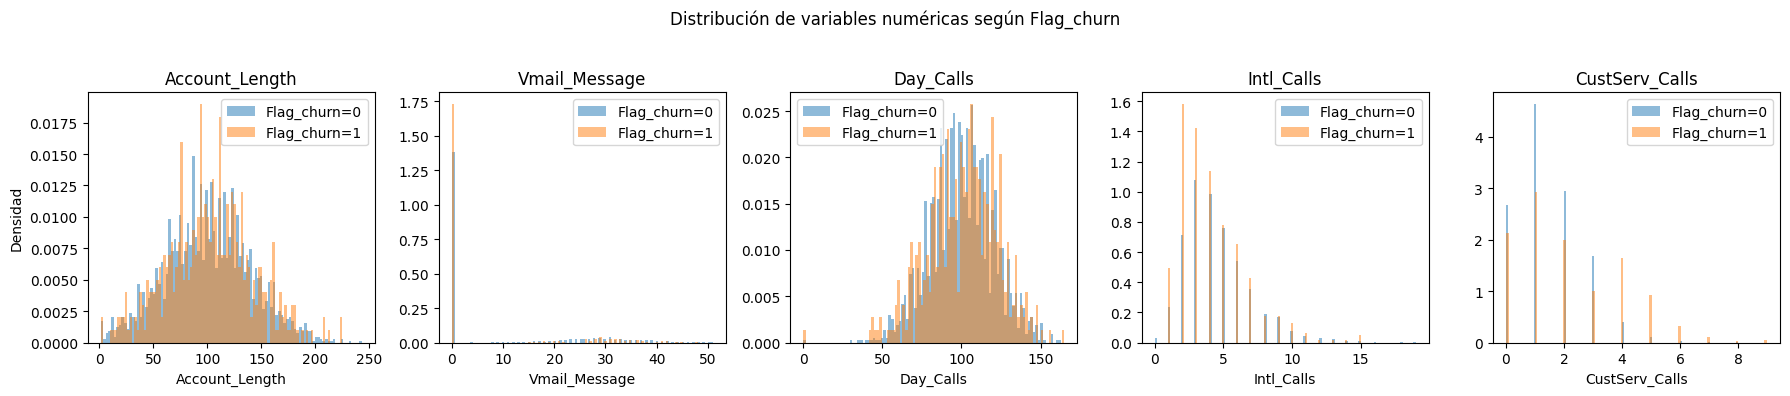

In [101]:

# comparacion de la distribucion de las variables numericas mas importantes frente al flag de churn
variables_numericas = ['Account_Length','Vmail_Message','Day_Calls','Intl_Calls', 'CustServ_Calls']

fig, axes = plt.subplots(1, len(variables_numericas), figsize=(18, 4))
for i, var in enumerate(variables_numericas):
    ax = axes[i]
    for flag in [0,1]:
        subset = df_churn[df_churn['Flag_churn'] == flag]
        ax.hist(subset[var], bins=100, alpha=0.5, label=f'Flag_churn={flag}', density=True)
    ax.set_title(f'{var}')
    ax.set_xlabel(var)
    if i == 0:
        ax.set_ylabel('Densidad')
    else:
        ax.set_ylabel('')
    ax.legend()
plt.suptitle('Distribución de variables numéricas según Flag_churn')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Se observa que CustServ_Calls a partir de 4 predomina el flag_churn=1 por lo que se aperturan los datos para obtener un mayor entendimiento


In [102]:
# Se observa que a partir del cuarto llamado de 
# atencion al cliente la propension de churn aumenta notoriamente de un 10% a un 44% aproximadamente.
df_churn.groupby('CustServ_Calls')['Flag_churn'].describe()

,count,mean,std,min,25%,50%,75%,max
CustServ_Calls,,,,,,,,
0,652.0,0.131902,0.338644,0.0,0.00,0.0,0.00,1.0
1,1102.0,0.107078,0.309353,0.0,0.00,0.0,0.00,1.0
2,704.0,0.113636,0.317595,0.0,0.00,0.0,0.00,1.0
3,397.0,0.100756,0.301385,0.0,0.00,0.0,0.00,1.0
4,152.0,0.434211,0.497291,0.0,0.00,0.0,1.00,1.0
5,59.0,0.627119,0.487722,0.0,0.00,1.0,1.00,1.0
6,21.0,0.619048,0.497613,0.0,0.00,1.0,1.00,1.0
7,8.0,0.500000,0.534522,0.0,0.00,0.5,1.00,1.0
8,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0


In [103]:
# Analisis descriptivo de Vmail_Plan frente a Flag_churn
df_churn.groupby('Vmail_Plan')['Flag_churn'].describe()

,count,mean,std,min,25%,50%,75%,max
Vmail_Plan,,,,,,,,
0,2244.0,0.165330,0.371561,0.0,0.0,0.0,0.0,1.0
1,855.0,0.088889,0.284750,0.0,0.0,0.0,0.0,1.0


### Una estrategia de ofrecimiento de Vmail podria lograr la fidelizacion del cliente ya que hay un 8% de propension al churn vs un 16 para quienes no tienen Vmail

In [104]:
# Analisis descriptivo de Intl_Plan frente a Flag_churn
df_churn.groupby('Intl_Plan')['Flag_churn'].describe()

,count,mean,std,min,25%,50%,75%,max
Intl_Plan,,,,,,,,
0,2800.0,0.114643,0.318647,0.0,0.0,0.0,0.0,1.0
1,299.0,0.421405,0.494612,0.0,0.0,0.0,1.0,1.0


### La propension de abandono de aquellos que tienen intl plan es casi 4 veces mas altas que los que no

## Deteccion de anomalias

In [105]:
# Detectar outliers usando el método del rango intercuartílico (IQR) para variables numéricas sin incluir Flag_churn
# Seleccionamos las variables numéricas, excluyendo 'Flag_churn'
# Se utiliza como corte el +- 3 para ser exigente en la detección
variables_numericas = df_churn.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_numericas = [v for v in variables_numericas if v != 'Flag_churn']

outliers_dict = {}

for var in variables_numericas:
    Q1 = df_churn[var].quantile(0.25)
    Q3 = df_churn[var].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 3 * IQR
    limite_superior = Q3 + 3 * IQR
    outliers = df_churn[(df_churn[var] < limite_inferior) | (df_churn[var] > limite_superior)]
    outliers_dict[var] = outliers.index.tolist()
    print(f"Variable: {var} - Cantidad de outliers detectados: {len(outliers)}")

# Si se desea ver los valores de los outliers por variable:
for var, idxs in outliers_dict.items():
    if len(idxs) > 0:
        valores = df_churn.loc[idxs, var].values
        print(f"Variable: {var} - Valores de outliers: {valores}")

Variable: Account_Length - Cantidad de outliers detectados: 0
Variable: Intl_Plan - Cantidad de outliers detectados: 299
Variable: Vmail_Plan - Cantidad de outliers detectados: 0
Variable: Vmail_Message - Cantidad de outliers detectados: 0
Variable: Day_Mins - Cantidad de outliers detectados: 0
Variable: Day_Calls - Cantidad de outliers detectados: 2
Variable: Eve_Mins - Cantidad de outliers detectados: 0
Variable: Eve_Calls - Cantidad de outliers detectados: 1
Variable: Night_Mins - Cantidad de outliers detectados: 0
Variable: Night_Calls - Cantidad de outliers detectados: 0
Variable: Intl_Mins - Cantidad de outliers detectados: 0
Variable: Intl_Calls - Cantidad de outliers detectados: 6
Variable: CustServ_Calls - Cantidad de outliers detectados: 33
Variable: Intl_Plan - Valores de outliers: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

### Se concluye no tratar los valores outliers dado que consideramos que aportan mucho valor a este analisis en particular. Sin embargo, en caso de querer tratarlos se puede imputar la media / moda / etc.

## MODELADO

## Seleccion de variables

#### Se realiza un test de hipotesis de diferencia de medias para cada variable con respecto a Churn para entender si la variable discrimina 

In [106]:
# Detectar variables significativas y no significativas entre los grupos de churn

# Listas para guardar los nombres de las variables
variables_significativas = []
variables_no_significativas = []

# Separar el DataFrame en churn = 1 y churn = 0
df_churn_1 = df_churn[df_churn['Flag_churn'] == 1]
df_churn_0 = df_churn[df_churn['Flag_churn'] == 0]

# Seleccionar todas las columnas excepto la variable objetivo
columnas = [col for col in df_churn.columns if col != 'Flag_churn']

for col in columnas:
    # Si la columna es numérica, aplicar t-test directamente
    if df_churn[col].dtype in ['int64', 'float64']:
        datos_1 = df_churn_1[col].dropna()
        datos_0 = df_churn_0[col].dropna()
        stat, pvalue = ttest_ind(datos_1, datos_0, equal_var=False)
        if pvalue < 0.05:
            variables_significativas.append(col)
        else:
            variables_no_significativas.append(col)
    # Si la columna es categórica, convertir a numérica usando codes y luego t-test
    else:
        datos_1 = df_churn_1[col].astype('category').cat.codes
        datos_0 = df_churn_0[col].astype('category').cat.codes
        stat, pvalue = ttest_ind(datos_1, datos_0, equal_var=False)
        if pvalue < 0.05:
            variables_significativas.append(col)
        else:
            variables_no_significativas.append(col)

print("Variables significativas (alfa = 0.05):")
print(variables_significativas)
print("\nVariables NO significativas (alfa = 0.05):")
print(variables_no_significativas)


Variables significativas (alfa = 0.05):
['Phone', 'Intl_Plan', 'Vmail_Plan', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Intl_Calls', 'CustServ_Calls']

Variables NO significativas (alfa = 0.05):
['State', 'Account_Length', 'Day_Calls', 'Eve_Calls', 'Night_Calls']


### Tomamos las variables significativas para el entrenamiento del modelo excluyendo Phone ya que es el identificador del usuario.

### Split - Metodo Holdout (70 % Train - 30 % Test)

In [107]:

# La variable objetivo es 'Flag_churn' 
# 
X = df_churn[['Intl_Plan', 'Vmail_Plan', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Intl_Calls', 'CustServ_Calls']]
y = df_churn['Flag_churn']

# Realizamos el split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (2169, 9), Test shape: (930, 9)


# Árbol de decision sin parametria

In [108]:
# 1. Árbol de Decisión

# Creamos el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

# Realizamos predicciones
y_pred_arbol = modelo_arbol.predict(X_test)

# Mostramos los resultados
print("Resultados Árbol de Decisión:")

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred_arbol)



Resultados Árbol de Decisión:


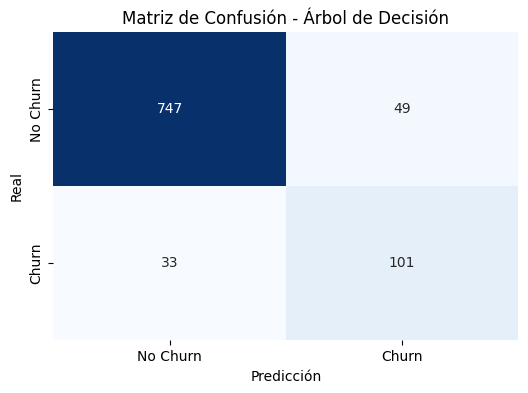

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       796
           1       0.67      0.75      0.71       134

    accuracy                           0.91       930
   macro avg       0.82      0.85      0.83       930
weighted avg       0.92      0.91      0.91       930

Accuracy: 0.9118



In [109]:

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

# También mostramos el reporte de clasificación y accuracy
print(classification_report(y_test, y_pred_arbol))
print(f"Accuracy: {accuracy_score(y_test, y_pred_arbol):.4f}\n")

### Se observa que la Accuracy del modelo es del 91 % a nivel general, sin embago al detectar los casos de churn tiene tan solo un 67%.En cuanto al Recall el benchmark establecido es de un 75%. Este modelo se utiliza de benchmark ya que al no tener parametros al ajustarlos todo resultado debe ser al menos mejor que este. 

# Desicion Tree con Hiperparametrizacion 

In [110]:
## PROBAMOS CON NUEVOS HIPERPARAMETROS

# Buscamos la mejor parametrización para el árbol de decisión
param_grid = {
    'max_depth': [3,4,5],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Creamos el modelo base
arbol = DecisionTreeClassifier(random_state=42)

# Configuramos el GridSearchCV
grid_search = GridSearchCV(
    estimator=arbol,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

# Ajustamos el GridSearch a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para DecisionTreeClassifier:")
print(grid_search.best_params_)

# Evaluamos el mejor modelo en el conjunto de prueba
mejor_arbol = grid_search.best_estimator_
y_pred_grid = mejor_arbol.predict(X_test)




Fitting 5 folds for each of 96 candidates, totalling 480 fits
Mejores hiperparámetros para DecisionTreeClassifier:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


Resultados Árbol de Decisión (Grid Search):


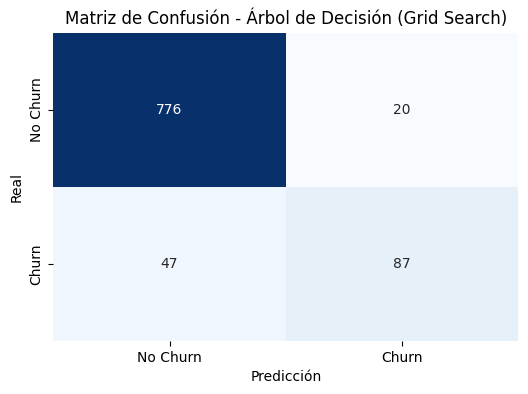

,precision,recall,f1-score,support
0,0.943,0.975,0.959,796.000
1,0.813,0.649,0.722,134.000
accuracy,0.928,0.928,0.928,0.928
macro avg,0.878,0.812,0.840,930.000
weighted avg,0.924,0.928,0.925,930.000


Accuracy: 0.9280



In [111]:
print("Resultados Árbol de Decisión (Grid Search):")

# Matriz de confusión
cm_grid = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(6,4))
sns.heatmap(cm_grid, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión (Grid Search)')
plt.show()


reporte = classification_report(y_test, y_pred_grid, output_dict=True)
df_reporte = pd.DataFrame(reporte).transpose()
df_reporte = df_reporte[['precision', 'recall', 'f1-score', 'support']]
df_reporte = df_reporte.round(3)
display(df_reporte)

# Mostramos el accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_grid):.4f}\n")

### Se observa una mejora sutil con respecto al árbol anterior, generando un aumento de presicion y recall en casi 2 puntos porcentuales, Accuracy de 0.05 puntos 

In [ ]:
# 2. Random Forest con GridSearchCV para optimizar hiperparámetros según recall

# Definimos el grid de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3,4,5],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini']
}

# Creamos el modelo base
rf = RandomForestClassifier(random_state=42)

# Configuramos el GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

# Ajustamos el GridSearch a los datos de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para RandomForestClassifier:")
print(grid_search_rf.best_params_)

# Evaluamos el mejor modelo en el conjunto de prueba
mejor_rf = grid_search_rf.best_estimator_
y_pred_rf = mejor_rf.predict(X_test)




Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros para RandomForestClassifier:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}


Resultados Random Forest (Grid Search):


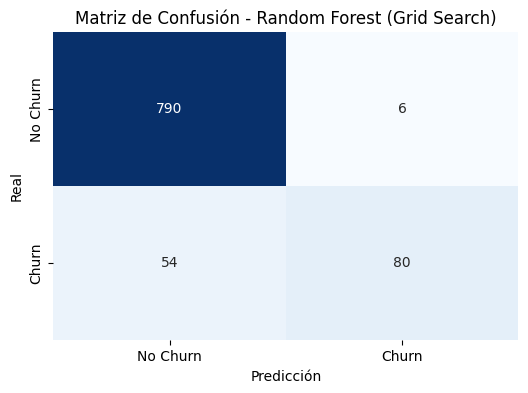

,precision,recall,f1-score,support
0,0.936,0.992,0.963,796.000
1,0.930,0.597,0.727,134.000
accuracy,0.935,0.935,0.935,0.935
macro avg,0.933,0.795,0.845,930.000
weighted avg,0.935,0.935,0.929,930.000


Accuracy: 0.9355



In [113]:
# Mostramos las métricas del modelo actual (Random Forest optimizado)
print("Resultados Random Forest (Grid Search):")

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest (Grid Search)')
plt.show()

# Reporte de clasificación
reporte_rf = classification_report(y_test, y_pred_rf, output_dict=True)
df_reporte_rf = pd.DataFrame(reporte_rf).transpose()
df_reporte_rf = df_reporte_rf[['precision', 'recall', 'f1-score', 'support']]
df_reporte_rf = df_reporte_rf.round(3)
display(df_reporte_rf)

# Mostramos el accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}\n")


###

### Al emplear un bosque de desicion en lugar a un solo arbol se obtiene una ganancia de 4% de Accuracy, La precision para la deteccion de posibles churns aumenta de 67% a 91%. En cuanto al recall no se observa diferencia significativa.




### 

In [122]:
# GridSearchCV para XGBoost

from xgboost import XGBClassifier

# Definimos el grid de hiperparámetros para XGBClassifier
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [2, 4],
    'learning_rate': [0.01, 0.1,0.2,0.3]
}

# Creamos el modelo base
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Configuramos el GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

# Ajustamos el GridSearch a los datos de entrenamiento
grid_search_xgb.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5], 'min_child_weight': [2, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=2)

Mejores hiperparámetros para XGBoost:
{'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 200}
Resultados XGBoost (Grid Search):


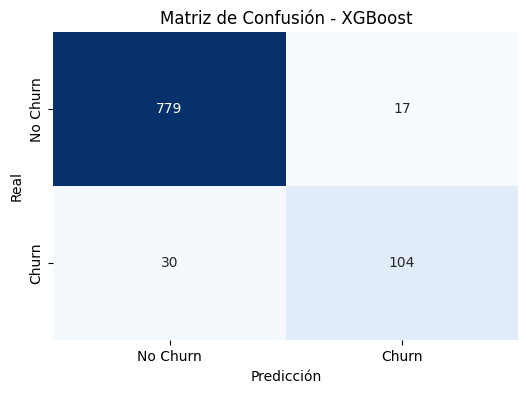

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       796
           1       0.86      0.78      0.82       134

    accuracy                           0.95       930
   macro avg       0.91      0.88      0.89       930
weighted avg       0.95      0.95      0.95       930

Accuracy: 0.9495



In [147]:
# Mostramos los mejores hiperparámetros encontrados para XGBoost
print("Mejores hiperparámetros para XGBoost:")
print(grid_search_xgb.best_params_)

# Evaluamos el mejor modelo de XGBoost en el conjunto de prueba
mejor_xgb = grid_search_xgb.best_estimator_
y_pred_xgb_grid = mejor_xgb.predict(X_test)

print("Resultados XGBoost (Grid Search):")

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_grid), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - XGBoost')
plt.show()

# Mostramos el reporte de clasificación y accuracy para XGBoost
print(classification_report(y_test, y_pred_xgb_grid))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_grid):.4f}\n")



### Al emplear XGBoost, al igual que con el bosque de decisión se observa una ganancia de 3 % en Accuracy, en cuanto a precision hay menos ganancia con respecto al bosque, sin embargo hay 3 puntos extra en cuanto al recall

### El modelo que mejor ajusta a nuestro interes es el Gradient Boosting ya que mejorar el recall es mas probable de captar aquellos clientes que realmente abandonarian la empresa,sin importar perder poca presicion. Para un modelo de churn, el recall es una metrica mas importante ya que el objetivo principal es identificar a la mayor cantidad de clientes en riesgo como sea posible, ya que el coste de perderlos suele superar con creces el coste de las acciones de retención.

## Creacion Score 

In [131]:
# 1. Predicción de probabilidad con XGBoost y agregar columna score

# Creamos el modelo XGBoost con los hiperparámetros especificados
modelo_xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=4,
    n_estimators=200
)
modelo_xgb.fit(X_train, y_train)

# Obtenemos la probabilidad de la clase positiva (por ejemplo, churn=1)
probabilidad_score = modelo_xgb.predict_proba(X_test)[:, 1]

# Agregamos la columna 'score' al DataFrame de test
df_scoreado = X_test.copy()
df_scoreado['score'] = probabilidad_score


# Convertimos las probabilidades en predicciones binarias usando un umbral (por defecto 0.5)
umbral = 0.5
y_pred_xgb = (probabilidad_score >= umbral).astype(int)



#### Ajustamos la probabilidad a un score de 1 a 999 donde a mayor más probabilidad de permanecer en la empresa

In [133]:
df_scoreado['score'] =  1 - df_scoreado['score']

In [134]:
df_scoreado['score'] = (df_scoreado['score'] * 998 + 1).round(0).astype(int)

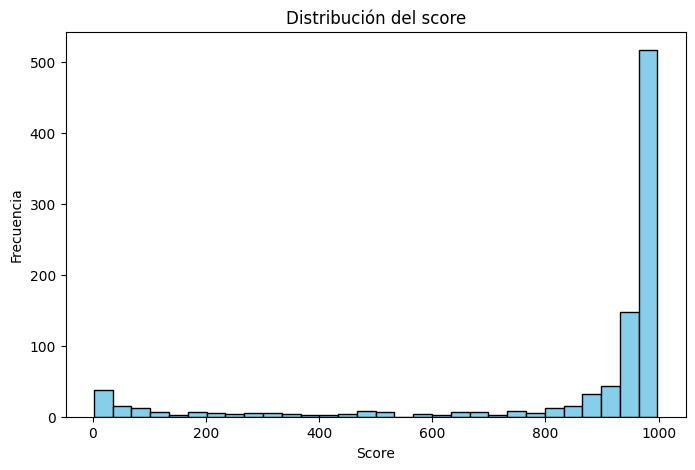

In [135]:
plt.figure(figsize=(8,5))
plt.hist(df_scoreado['score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del score')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.show()